In [343]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### Read the input file and check the data dimension

In [344]:
data = pd.read_csv("german_credit.csv")
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [345]:
data

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [346]:
# You can access from https://www.kaggle.com/uciml/german-credit
# Read input file and understand the data
# "default" is my dependent variable

data.shape

(1000, 21)

In [347]:
data.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [348]:
data.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [349]:
data1,data2= train_test_split(data, test_size=0.5, random_state = 85)

In [350]:
# Lets build a Ensemble model but need to modify the dataset first
data1.shape

(500, 21)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [351]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
data_gc = pd.get_dummies(data1, columns=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])

In [352]:
data_gc_model = data_gc.drop(['default'], axis = 1)

In [353]:
data_gc_model.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [354]:
data_gc.corr().transpose()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.162646,0.109093,0.034277,0.049563,-0.058880,-0.033474,-0.074380,0.127903,0.287573,...,-0.090649,0.070237,0.002418,0.029086,-0.029475,-0.026339,0.012639,-0.012639,-0.042502,0.042502
duration_in_month,0.162646,1.000000,0.619442,0.072244,0.099164,-0.009755,-0.019005,0.008474,0.060825,0.024240,...,-0.135166,-0.085349,0.168865,0.049245,-0.010735,-0.195927,-0.151773,0.151773,-0.114925,0.114925
credit_amount,0.109093,0.619442,1.000000,-0.318422,0.080469,0.060904,0.054780,0.042066,0.045991,0.038507,...,-0.192661,-0.008855,0.358730,-0.083129,-0.031154,-0.189723,-0.295487,0.295487,-0.041577,0.041577
installment_as_income_perc,0.034277,0.072244,-0.318422,1.000000,0.058055,0.088690,0.003631,-0.056872,-0.069024,0.042182,...,0.093497,-0.128671,0.023072,0.047822,-0.087157,-0.045713,-0.004042,0.004042,-0.048990,0.048990
present_res_since,0.049563,0.099164,0.080469,0.058055,1.000000,0.270625,0.060122,0.047723,-0.072437,0.116056,...,-0.350785,0.176229,0.048923,-0.014855,-0.022412,-0.015328,-0.131881,0.131881,-0.051065,0.051065
age,-0.058880,-0.009755,0.060904,0.088690,0.270625,1.000000,0.137914,0.081671,-0.133624,0.036679,...,0.011633,-0.235118,0.120079,-0.181623,0.048781,0.098918,-0.130292,0.130292,-0.023410,0.023410
credits_this_bank,-0.033474,-0.019005,0.054780,0.003631,0.060122,0.137914,1.000000,0.122588,-0.072826,-0.002420,...,-0.024006,0.008718,-0.003681,0.004826,-0.002864,-0.001671,-0.123053,0.123053,-0.030225,0.030225
people_under_maintenance,-0.074380,0.008474,0.042066,-0.056872,0.047723,0.081671,0.122588,1.000000,-0.083001,0.042055,...,0.009258,-0.085739,0.023471,-0.128170,-0.060012,0.154031,-0.037704,0.037704,0.050919,-0.050919
account_check_status_0 <= ... < 200 DM,0.127903,0.060825,0.045991,-0.069024,-0.072437,-0.133624,-0.072826,-0.083001,1.000000,-0.376988,...,-0.013063,0.010925,0.032209,-0.064708,0.110733,0.011399,0.010388,-0.010388,-0.055959,0.055959
account_check_status_< 0 DM,0.287573,0.024240,0.038507,0.042182,0.116056,0.036679,-0.002420,0.042055,-0.376988,1.000000,...,-0.119137,0.088420,0.007509,-0.008234,-0.027762,0.013250,0.048301,-0.048301,0.060026,-0.060026


### Drop the original variables which are converted to dummy

In [355]:
data= data.drop(['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'], axis = 1)
data.shape

(1000, 8)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [356]:
X = data.drop(['default'], axis = 1)
Y = data['default']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 85)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
model = RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999)
RF_fit = model.fit(X_train, Y_train)

In [358]:
data_gc_predict = RF_fit.predict(X_test)
data_gc_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], d

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [359]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(Y_test, data_gc_predict))
print("Confusion Matrix:\n", confusion_matrix(Y_test, data_gc_predict))

Accuracy: 0.7166666666666667
Confusion Matrix:
 [[194  19]
 [ 66  21]]


### Q6 Show the list of the features importance( 1 Marks)

In [360]:
print("Features which are Importance ", RF_fit.feature_importances_)

Features which are Importance  [0.1873858  0.336565   0.07119331 0.08143254 0.25113594 0.04864202
 0.0236454 ]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [361]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict

In [362]:
# Use below values
num_folds = 10
seed = 77

In [363]:
#Validate the Random Forest model build above using k fold

In [364]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [365]:
gc_arr = data.values
X1 = gc_arr[:,1:8]
Y1 = gc_arr[:,0]
# feature extraction
scores = []
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=False)
for train_index, test_index in kfold.split(X1):
    X1_train, X1_test, y1_train, y1_test = X1[train_index], X1[test_index], Y1[train_index], Y1[test_index]
    scores.append(get_score(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X1_train, X1_test, y1_train, y1_test))


In [366]:
scores

[0.78, 0.67, 0.68, 0.75, 0.74, 0.62, 0.71, 0.77, 0.67, 0.7]

In [367]:
probs = model.predict_proba(X1_test)
probs
probs = probs[:, 1]

In [368]:
#Calculate Mean score

np.mean(scores)

0.7090000000000001

In [369]:
# Calculate score standard deviation using std()

In [370]:
np.std(scores)

0.04825971404805461

In [371]:
y_predict = cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X1, Y1, cv=10)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Q8 Print the confusion matrix( 1 Marks)

In [372]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(Y1, y_predict))

Confusion Matrix:
 [[628  72]
 [218  82]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [373]:
print("Accuracy:", accuracy_score(Y1, y_predict))

Accuracy: 0.71


In [374]:
from sklearn import metrics
print(metrics.classification_report(Y1,y_predict))

             precision    recall  f1-score   support

          0       0.74      0.90      0.81       700
          1       0.53      0.27      0.36       300

avg / total       0.68      0.71      0.68      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [375]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y1_test, probs)

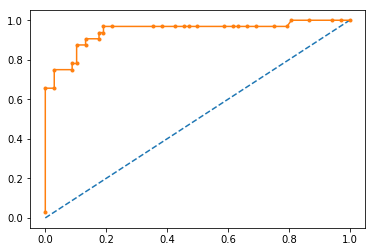

In [376]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [377]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.944


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [378]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [379]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
german_credit_df_Case1_dummies =  pd.get_dummies(german_credit_df_X_Case1,columns=categorical_columns)
german_credit_df_Case2_dummies =  pd.get_dummies(german_credit_df_X_Case2,columns=categorical_columns)

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: name 'german_credit_df_X_Case1' is not defined

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())